In [46]:
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import base64
import requests
import random

##### *(Analysis plan is halfway down the page)*
# Data In Hand

So Steam has their own [web API](https://steamcommunity.com/dev) that I can use to access the data of my Steam profile. The first steps I needed to take was to find my Steam ID as well as obtain a Steam API key. My Steam ID is a 17-digit number that's located in the URL of my profile. As for the Steam API key, I needed to fill out a form on the Steam website in order to obtain a key. All it asked was to create a domain name and agree with the terms of use, then it would give me my own API key. Once I have both my key and my ID, I'll put them in a text file, and then read the contents of that text file using different variables.

In [47]:
keys = pd.read_csv("Steam-Keys.txt", header = 0, sep = ",")

In [48]:
steamApiKey = keys['Steam_Key'][0]
steamID = keys['Steam_ID'][0]

The next thing I needed to do was to find a Steam API link and then format that link. What I found was the [GetOwnedGames](https://developer.valvesoftware.com/wiki/Steam_Web_API#GetOwnedGames_.28v0001.29) method which will allow me to retrieve the list of games in my library. I'll use the given URL to initialize 'slink1' while also inserting my Steam ID and my API key in the url.

In [49]:
slink1 = 'http://api.steampowered.com/IPlayerService/GetOwnedGames/v0001/?key=' + str(steamApiKey) + '&steamid=' + str(steamID) + '&format=json'
slink2 = "&steamid=" + str(steamID) + "&include_appinfo=1&format=json"
slink = slink1 + steamApiKey + slink2

After defining my 'slink' variables, I'll make a variable called 'r' and use the requests.get() method to retrieve the data from 'slink.' Then I will convert the data from 'r' into a JSON so that I would be able to make my data frames.

In [50]:
r = requests.get(slink)
steam = r.json()
#steam

Everything in the JSON is nested inside the 'response' title, so the default data frame will just use 'response' as a column and only display 'game_count' and 'games.' I need to take some steps to format the data frame to get the information I need.

In [51]:
pd.DataFrame(steam)

,response
game_count,86
games,"[{'appid': 50, 'name': 'Half-Life: Opposing Fo..."


Putting ['response'] inside the parenthesis will separate 'game_count' and 'games' into their own column. As of right now, the only valuable information I have in this data frame is that it tells me that I have 86 games in my Steam library. What I want now is to display everything from the 'games' in their own data frame and separate each category into their own column.

In [52]:
steam_df = pd.DataFrame(steam['response'])
steam_df

,game_count,games
0,86,"{'appid': 50, 'name': 'Half-Life: Opposing For..."
1,86,"{'appid': 70, 'name': 'Half-Life', 'playtime_f..."
2,86,"{'appid': 130, 'name': 'Half-Life: Blue Shift'..."
3,86,"{'appid': 3830, 'name': 'Psychonauts', 'playti..."
4,86,"{'appid': 6910, 'name': 'Deus Ex: Game of the ..."
...,...,...
81,86,"{'appid': 1178880, 'name': 'Panzer Dragoon: Re..."
82,86,"{'appid': 966720, 'name': 'Pumped BMX Pro', 'p..."
83,86,"{'appid': 231430, 'name': 'Company of Heroes 2..."
84,86,"{'appid': 1818750, 'name': 'MultiVersus', 'pla..."


In [53]:
steam_df['games']

0     {'appid': 50, 'name': 'Half-Life: Opposing For...
1     {'appid': 70, 'name': 'Half-Life', 'playtime_f...
2     {'appid': 130, 'name': 'Half-Life: Blue Shift'...
3     {'appid': 3830, 'name': 'Psychonauts', 'playti...
4     {'appid': 6910, 'name': 'Deus Ex: Game of the ...
                            ...                        
81    {'appid': 1178880, 'name': 'Panzer Dragoon: Re...
82    {'appid': 966720, 'name': 'Pumped BMX Pro', 'p...
83    {'appid': 231430, 'name': 'Company of Heroes 2...
84    {'appid': 1818750, 'name': 'MultiVersus', 'pla...
85    {'appid': 1301210, 'name': 'Knockout City™', '...
Name: games, Length: 86, dtype: object

If I use the "list()" function and put "steam_df['games']" inside the parenthesis, it will create a data frame that lists all the information from 'games,' with every category separated into their own columns. This data frame lists every game that I own as well as the play time for each game. Now I have the data I need in order to find out how many games I've played in my library and how many I still haven't played.

In [54]:
games = pd.DataFrame(list(steam_df['games']))
games

,appid,name,playtime_forever,img_icon_url,playtime_windows_forever,playtime_mac_forever,playtime_linux_forever,rtime_last_played,has_community_visible_stats,has_leaderboards,playtime_2weeks
0,50,Half-Life: Opposing Force,470,04e81206c10e12416908c72c5f22aad411b3aeef,0,0,0,1515201732,NaN,NaN,NaN
1,70,Half-Life,1401,95be6d131fc61f145797317ca437c9765f24b41c,0,0,0,1515103702,NaN,NaN,NaN
2,130,Half-Life: Blue Shift,233,b06fdee488b3220362c11704be4edad82abeed08,0,0,0,1515301292,NaN,NaN,NaN
3,3830,Psychonauts,1688,460b6471db7d83ee6943c1a87f7a9f2898634952,0,0,0,1520911660,True,NaN,NaN
4,6910,Deus Ex: Game of the Year Edition,0,03c8e5e89d83c536b44798e77ead5d813103991f,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
81,1178880,Panzer Dragoon: Remake,0,d00adb1a1a70663380eaa17a0835a9cf5931f23c,0,0,0,0,True,True,NaN
82,966720,Pumped BMX Pro,0,43013764d179d58f2bb2b6be317e67b715e252f7,0,0,0,0,True,NaN,NaN
83,231430,Company of Heroes 2,0,5e7e1866fb4f33a17393b0441cd1c750dbd91c5f,0,0,0,0,True,NaN,NaN
84,1818750,MultiVersus,197,b99e0727d4b37c022f33f8f72fada74c5108aac0,197,0,0,1661661046,True,NaN,NaN


# Analysis Plan

I think most of the columns in my data frame aren't necessary to come up with a conclusion for my report, so I decided to remake the data frame by removing every column except for 'name' and 'playtime_forever.'

In [55]:
order = games.sort_values('playtime_forever', ascending=False)
gameOrder = order.drop(columns = ['appid', 'img_icon_url', 'playtime_windows_forever', 'playtime_mac_forever', 'playtime_linux_forever', 'rtime_last_played', 'has_community_visible_stats', 'has_leaderboards', 'playtime_2weeks'])
gameOrder

,name,playtime_forever
20,Terraria,12234
64,Celeste,3202
34,Knytt Underground,2310
58,System Shock: Enhanced Edition,1695
3,Psychonauts,1688
...,...,...
50,Devil May Cry 4 Special Edition,0
51,Firewatch,0
52,Ori and the Blind Forest,0
53,Ori and the Blind Forest: Definitive Edition,0


I decided to experiment by creating different types of plots for my data frame to see which ones could be the most suitable for my analysis. The first plot I made is a histogram, and it shows that I have a lot of games in my library with 0 playtime. This indicates that I have way more games in my Steam library that I have not played yet than there are games that I have played.

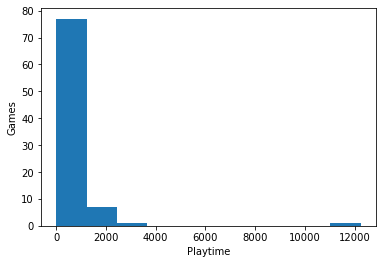

In [56]:
gameOrder['playtime_forever'].plot.hist()
plt.xlabel('Playtime')
plt.ylabel('Games')
plt.show()

The next plot I made is a bar graph and I decided to only show the first 20 entries as well as rotate the graph sideways so that you can read each title horizontally. As you can see, while there are plenty of games that I've played on Steam, Terraria is the game where I've put far more hours into my playtime than any other game in my library. What I would like to figure out now is how I can make a bar graph that shows one bar representing my unplayed games and another bar showing the games I've actually played.

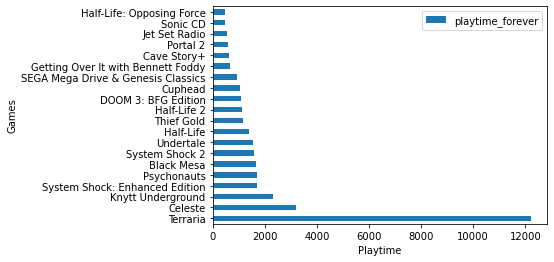

In [57]:
gameOrder.head(n=20).plot.barh(y='playtime_forever', x='name')
plt.xlabel('Playtime')
plt.ylabel('Games')
plt.show()

Out of curiosity, I decided to make a box and whisker plot out of my data frame just to see what it would look like. I may decide to remove this plot from my final report because of the large empty space inside this box plot. This is a really large gap between two of my most played games, but this plot doesn't seem very necessary to use for my final analysis.

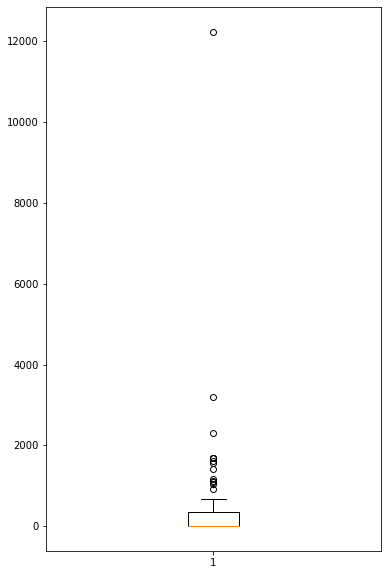

In [58]:
fig1, ax1 = plt.subplots()
ax1.boxplot(gameOrder['playtime_forever'])
fig1.set_figheight(10)

The last plot I made is a pie chart and I think this might have the most potential in my final analysis. As of right now, it only shows the playtime for each game in my library, but nothing is labeled in the chart, so I will have to work on that in my final report. Just like the bar graph, I would also like to figure out how I can make the pie chart only display one piece showing my unplayed games and another piece showing my played games.

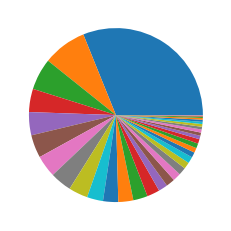

In [59]:
fig2, ax2 = plt.subplots()
ax2.pie(gameOrder['playtime_forever'])
plt.show()